In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


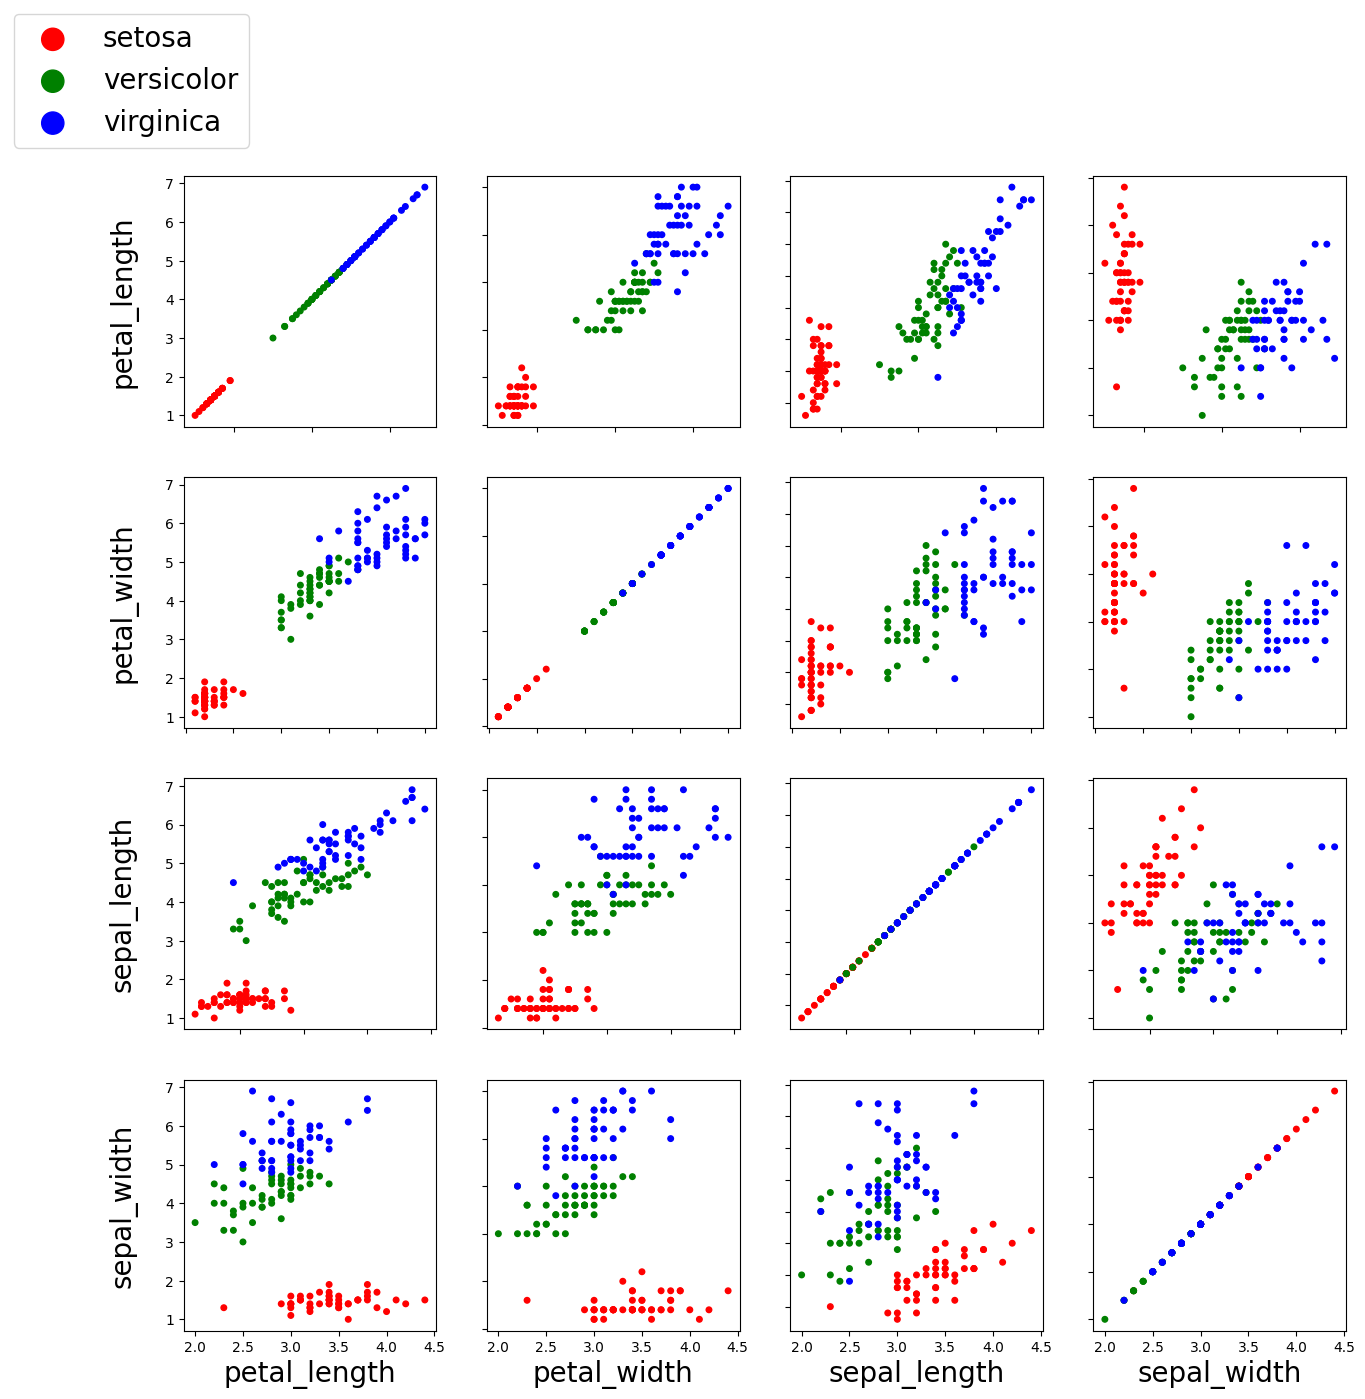

In [2]:
# Original dataset as a dataframe
iris_original = pd.read_csv('../data/iris_original.csv')

# In case we need ndarray of data
labels = iris_original['species'].to_numpy() # array of string labels
keys = iris_original.columns.values[:-1] # array of string column variable names
data = iris_original.drop('species', axis=1).to_numpy() # all data without labels (petal_length, petal_width, sepal_length, sepal_width)

# Plot data
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(15,15))

values, indices, counts = np.unique(labels, return_inverse=True, return_counts=True)
colors = ['r','g','b']
for rowidx, row in enumerate(ax):
    for colidx, col in enumerate(row):
        for label, df in iris_original.groupby('species'):
            label_idx = np.where(values==label)[0][0]
            col.scatter(df.iloc[:,rowidx], df.iloc[:,colidx], c=counts[label_idx]*[colors[label_idx]], s=16, label=label)
        col.set_xlabel(iris_original.columns[colidx], fontsize=20)
        col.set_ylabel(iris_original.columns[rowidx], labelpad=20, fontsize=20)
        col.label_outer()
# for axis in ax.flat:
#     axis.set(xlabel='x-axis', ylabel='y axis')
#     axis.label_outer()
handles, lbls = plt.gca().get_legend_handles_labels()
fig.legend(handles, lbls, loc='upper left', fontsize=20, markerscale=4)
plt.show()

In [3]:
tts_seed = 123

x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.4, shuffle=True, random_state=tts_seed)
x_train

array([[4.5, 1.5, 6.2, 2.2],
       [5.8, 2.2, 6.5, 3. ],
       [4.7, 1.2, 6.1, 2.8],
       [5.6, 2.4, 6.7, 3.1],
       [4.6, 1.3, 6.6, 2.9],
       [1.7, 0.5, 5.1, 3.3],
       [3. , 1.1, 5.1, 2.5],
       [4.8, 1.4, 6.8, 2.8],
       [4.3, 1.3, 6.2, 2.9],
       [1.6, 0.2, 5. , 3. ],
       [5.7, 2.3, 6.9, 3.2],
       [1.5, 0.2, 5.1, 3.4],
       [4.5, 1.7, 4.9, 2.5],
       [3.5, 1. , 5.7, 2.6],
       [1.7, 0.4, 5.4, 3.9],
       [3.8, 1.1, 5.5, 2.4],
       [1.2, 0.2, 5. , 3.2],
       [1.5, 0.3, 5.1, 3.8],
       [1.6, 0.4, 5. , 3.4],
       [1.3, 0.4, 5.4, 3.9],
       [1.4, 0.2, 4.4, 2.9],
       [3.6, 1.3, 5.6, 2.9],
       [4.6, 1.4, 6.1, 3. ],
       [1.4, 0.2, 5. , 3.6],
       [4.8, 1.8, 5.9, 3.2],
       [5.1, 2.4, 5.8, 2.8],
       [6.3, 1.8, 7.3, 2.9],
       [5.1, 1.8, 5.9, 3. ],
       [5. , 2. , 5.7, 2.5],
       [1.9, 0.4, 5.1, 3.8],
       [1.4, 0.2, 4.6, 3.2],
       [1.5, 0.2, 5.2, 3.5],
       [4.5, 1.5, 6. , 2.9],
       [1.6, 0.2, 5.1, 3.8],
       [4.1, 1

In [4]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5,2), random_state=42)
clf.fit(x_train, y_train)
print(f'{round(clf.score(x_test, y_test), 4)*100}% accuracy on neural network')

96.67% accuracy on neural network


In [5]:
#Generating new features, adding them to dataframe (preserving original by deepcopying)

petal_LW = iris_original['petal_length']*iris_original['petal_width']
sepal_LW = iris_original['sepal_length']*iris_original['sepal_width']

petal_L2 = iris_original['petal_length']*iris_original['petal_length']
petal_W2 = iris_original['petal_width']*iris_original['petal_width']
sepal_L2 = iris_original['sepal_length']*iris_original['sepal_length']
sepal_W2 = iris_original['sepal_width']*iris_original['sepal_width']

expanded_df = iris_original.copy(deep= "true")

expanded_df['petal_LW'] = petal_LW
expanded_df['sepal_LW'] = sepal_LW

expanded_df['petal_L2'] = petal_L2
expanded_df['petal_W2'] = petal_W2
expanded_df['sepal_L2'] = sepal_L2
expanded_df['sepal_W2'] = sepal_W2

ex_labels = expanded_df['species'].to_numpy() # array of string labels
ex_keys = expanded_df.columns.values[:-1] # array of string column variable names
ex_data = expanded_df.drop('species', axis=1).to_numpy() # all data without labels (petal_length, petal_width, sepal_length, sepal_width)

print(expanded_df)



     petal_length  petal_width  sepal_length  sepal_width    species  \
0             1.4          0.2           5.1          3.5     setosa   
1             1.4          0.2           4.9          3.0     setosa   
2             1.3          0.2           4.7          3.2     setosa   
3             1.5          0.2           4.6          3.1     setosa   
4             1.4          0.2           5.0          3.6     setosa   
..            ...          ...           ...          ...        ...   
145           5.2          2.3           6.7          3.0  virginica   
146           5.0          1.9           6.3          2.5  virginica   
147           5.2          2.0           6.5          3.0  virginica   
148           5.4          2.3           6.2          3.4  virginica   
149           5.1          1.8           5.9          3.0  virginica   

     petal_LW  sepal_LW  petal_L2  petal_W2  sepal_L2  sepal_W2  
0        0.28     17.85      1.96      0.04     26.01     12.25  
1  

In [6]:
#Generating PCA data
from functions import PCA
from functions import tSNE

pcaData = PCA(data)

print(pcaData)

(array([[ 2.81823932e+00, -5.64635060e+00, -6.59762347e-01,
        -3.10932338e-02],
       [ 2.78822327e+00, -5.14995237e+00, -8.42312098e-01,
         6.56716436e-02],
       [ 2.61337439e+00, -5.18200388e+00, -6.13947666e-01,
        -1.33869380e-02],
       [ 2.75702213e+00, -5.00865423e+00, -6.00288856e-01,
        -1.08930972e-01],
       [ 2.77364842e+00, -5.65370769e+00, -5.41768372e-01,
        -9.46144640e-02],
       [ 3.22150530e+00, -6.06828362e+00, -4.63169503e-01,
        -5.75571805e-02],
       [ 2.68182721e+00, -5.23749164e+00, -3.73955816e-01,
        -8.14988554e-02],
       [ 2.87621999e+00, -5.49033826e+00, -6.53727055e-01,
        -7.86533892e-02],
       [ 2.61598225e+00, -4.74864150e+00, -6.11088824e-01,
        -6.00996464e-02],
       [ 2.82960918e+00, -5.21317919e+00, -8.29480737e-01,
        -8.96503806e-02],
       [ 2.99541785e+00, -5.97202229e+00, -7.07165253e-01,
        -4.83758062e-02],
       [ 2.88960975e+00, -5.34168302e+00, -5.29697788e-01,
     

C:\Users\benne\Documents\Northeastern\ML\6140Project\src\functions.py:10: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


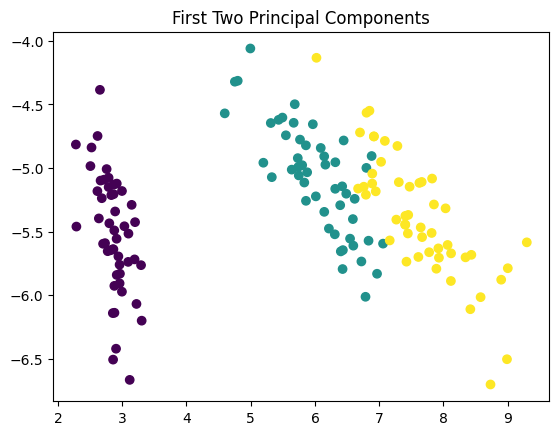

In [7]:
plt.scatter(pcaData[0][:,0], pcaData[0][:,1], c=np.unique(labels, return_inverse=True)[1])
plt.title('First Two Principal Components')
plt.show()

In [8]:
#testing neural net on PCA-generated data

pcaDatOnly = pcaData[0]
pca_x_train, pca_x_test, pca_y_train, pca_y_test = train_test_split(pcaDatOnly, labels, test_size=0.4, shuffle=True)

clf2 = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5,2), random_state=42)
clf2.fit(pca_x_train, pca_y_train)
print(f'{round(clf2.score(pca_x_test, pca_y_test), 4)*100}% accuracy on neural network')

23.330000000000002% accuracy on neural network


In [9]:
#testing neural net on first 3 components

pcaDat2 = pcaDatOnly[:,:3]
pca2_x_train, pca2_x_test, pca2_y_train, pca2_y_test = train_test_split(pcaDat2, labels, test_size=0.4, shuffle=True)


clf3 = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5,2), random_state=42)
clf3.fit(pca2_x_train, pca2_y_train)
print(f'{round(clf3.score(pca2_x_test, pca2_y_test), 4)*100}% accuracy on neural network')

31.669999999999998% accuracy on neural network


In [10]:
#testing neural net on raw expanded data

ex_x_train, ex_x_test, ex_y_train, ex_y_test = train_test_split(ex_data, ex_labels, test_size=0.4, shuffle=True)

clf4 = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5,2), random_state=42)
clf4.fit(ex_x_train, ex_y_train)
print(f'{round(clf4.score(ex_x_test, ex_y_test), 4)*100}% accuracy on neural network')

#crappy result, probably overdetermined/overfitting with "more" data
#might need to be more selective, or try combining with pca...

70.0% accuracy on neural network
